In [16]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [17]:
#скачали dataset 
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [18]:
# 60000 изображений размером 28x28
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [19]:
class_names = [
    'zero',    
    'one',        
    'two',       
    'three',          
    'four',           
    'five',         
    'six',         
    'seven',        
    'eight',           
    'nine'      
]

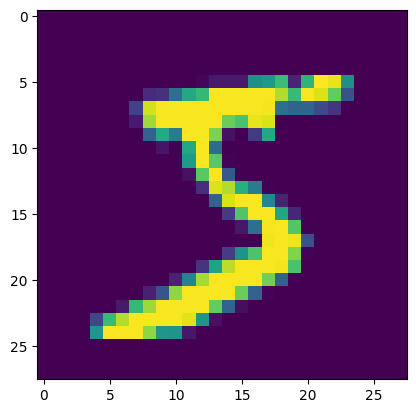

In [20]:
plt.imshow(train_x[0])

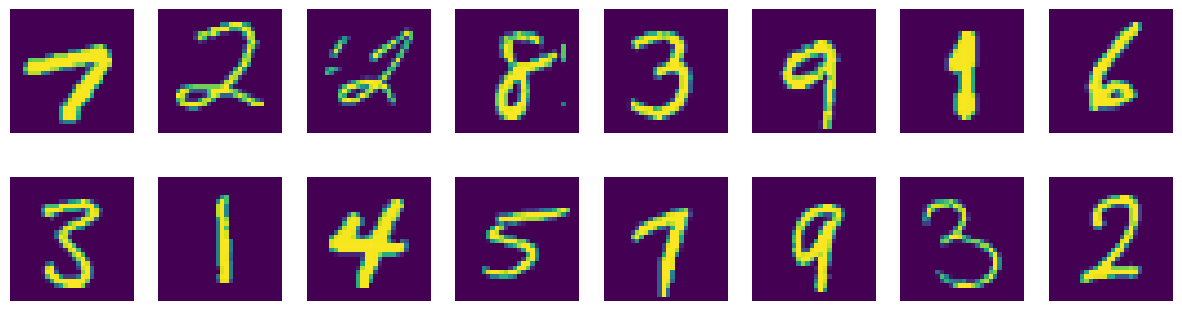

In [21]:
# посмотрим на примеры картинок
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(train_y))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(train_x[random_index, :])

plt.show()

In [22]:
#преобразуем целочисленные значения пикселей в диапазон [0, 1] и сдвигает диапазон к [-0.5, 0.5]
train_x_2 = train_x.astype('float32') / 255 - 0.5
test_x_2 = test_x.astype('float32') / 255 - 0.5

#преобразуем значения в вид one_hot 
# 3 = [0,0,1,0,0,0,0,0,0,0]
train_y_onehot = keras.utils.to_categorical(train_y, 10)
test_y_onehot = keras.utils.to_categorical(test_y, 10)


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [24]:
model = Sequential()
# filters=16 (16 фильтров), kernel_size=3 (ядро 3х3), padding='same' (0 вокруг изображения), input_shape=(32,32,3) (входное изображение)
model.add(L.Conv2D(filters=16, kernel_size=3, padding='same', input_shape=(28,28,3), activation='relu'))
model.add(L.Conv2D(filters=32, kernel_size=3, padding='same',activation='relu'))
model.add(L.MaxPool2D())
model.add(L.Dropout(0.25))

model.add(L.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(L.Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(L.MaxPool2D())
model.add(L.Dropout(0.25)) 

model.add(L.Flatten())
model.add(L.Dense(128, activation='relu'))
model.add(L.Dropout(0.25))
model.add(L.Dense(10, activation='softmax'))

In [25]:
K.clear_session()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,658 (1.66 MB)

 Trainable params: 435,658 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
history = model.fit(
                    train_x_2, 
                    train_y_onehot,
                    batch_size=64,  # 64 объекта для подсчета градиента на каждом шаге
                    epochs=10,  # 10 проходов по датасету
                    validation_data=(test_x_2, test_y_onehot)
                    )

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 28, 28, 3), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>